In [13]:
!pip3 install face_recognition
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from google.colab import drive
import face_recognition
from sklearn import svm
from PIL import Image, ImageDraw

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
def loadDataLabels(data_path):
    faces = []
    labels = []
    enc_labels = []
    directories = os.listdir(data_path)
    for i, direc in enumerate(directories):
        sub_dir_path = data_path + "/" + direc
        sub_dir_images = os.listdir(sub_dir_path)
        label = direc
        for j, image_name in enumerate(sub_dir_images):
            image_path = sub_dir_path + "/" + image_name
            img = cv2.imread(image_path)
            image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#             face_detected, shape = face_detection(img)
#             if face_detected is not None:
#                 face_detected = cv2.resize(face_detected, (64, 64))
#                 faces.append(face_detected)
#                 labels.append(label)
            if image is not None:
                image = cv2.resize(image, (256, 256))
                faces.append(image)
                labels.append(label)
    labels = np.array(labels)
    label_encoder = preprocessing.LabelEncoder()
    enc_labels = label_encoder.fit_transform(labels) 
    labels_unique = label_encoder.classes_
    faces = np.array(faces)
    labels_unique = np.array(labels_unique)
    enc_labels = np.array(enc_labels)
    return faces, labels, labels_unique, enc_labels

In [0]:
faces, labels, unique_labels, enc_labels = loadDataLabels("/content/drive/My Drive/AVR_data")
(X_train, X_test, y_train, y_test) = train_test_split(faces, enc_labels, test_size = 0.25, random_state = 42)

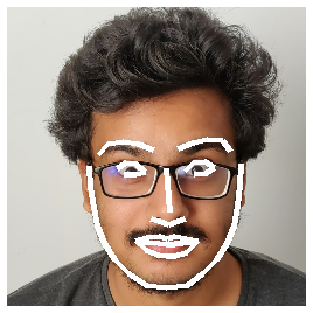

In [46]:
def drawAlignFace(image):
  dict = face_recognition.face_landmarks(image)
  pil_image = Image.fromarray(image)
  d = ImageDraw.Draw(pil_image)

  for face_landmarks in dict:
    for facial_feature in face_landmarks.keys():
      d.line(face_landmarks[facial_feature], width=5)
  pil_image.show()
  plt.imshow(np.asarray(pil_image))
  plt.xticks([]), plt.yticks([])
  
drawAlignFace(X_train[23])

In [0]:
def getEncodings(X_train, y_train):
    faceEncodings = []
    faceEncodingLabels = []
    for i in range(len(X_train)):
      face_loc = face_recognition.face_locations(X_train[i])
      face_enc = face_recognition.face_encodings(X_train[i], face_loc)
      if (len(face_enc) != 0):
        faceEncodings.append(face_enc[0])
        faceEncodingLabels.append(y_train[i])
    return faceEncodings, faceEncodingLabels

In [25]:
faceEncodings, faceEncodingLabels = getEncodings(X_train, y_train)
faceEncodings_test, faceEncodingLabels_test = getEncodings(X_test, y_test)
# print(len(faceEncodingLabels_test))
# print(len(y_test))

187
215


In [0]:
# predictions = []
# for i in range(len(faceEncodings_test)):
#   distances = face_recognition.face_distance(faceEncodings, faceEncodings_test[i])
#   min_ind = np.argmin(distances)
#   predictions.append(faceEncodingLabels[min_ind])
  
# for i in range(len(faceEncodings())):
#   pred_matrix.append(face_recognition.face_distance(faceEncodings, X_test1[i]))

In [0]:
# print(predictions)
# print(faceEncodingLabels_test)
# count = 0
# for i in range(len(predictions)):
#   if (predictions[i] == faceEncodingLabels_test[i]):
#     count += 1
# print(count/len(y_test))

In [28]:
modelSVM = svm.SVC(kernel = 'linear')
modelSVM.fit(faceEncodings, faceEncodingLabels)
predictionsSVM = modelSVM.predict(faceEncodings_test)
print("SVM Accuracy: {}%".format(modelSVM.score(faceEncodings_test, faceEncodingLabels_test) * 100 ))

SVM Accuracy: 94.6524064171123%
